In [16]:
import pandas as pd

df = pd.read_csv(f'{path}/bestsellers with categories.csv')
display(df.head())

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [17]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [20]:
df.shape

(550, 7)

In [18]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [25]:
df.dtypes

name            object
author          object
user_rating    float64
reviews          int64
price            int64
year             int64
genre           object
dtype: object

In [24]:
print(df['genre'].unique())

['Non Fiction' 'Fiction']


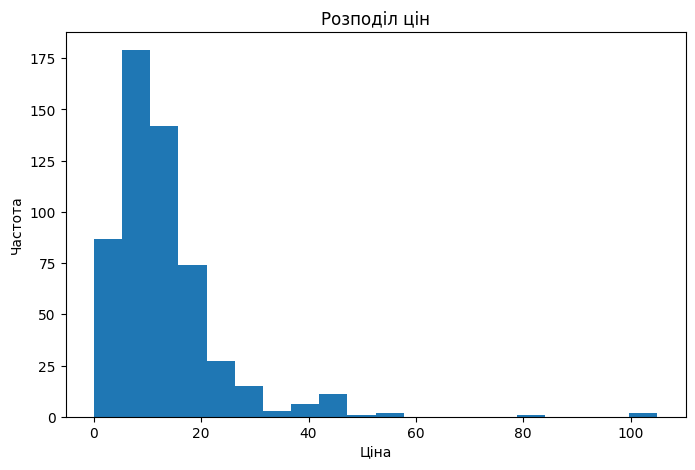

In [27]:
import matplotlib.pyplot as plt

df['price'].plot(kind='hist', bins=20, figsize=(8, 5), title='Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

In [29]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [31]:
# 1. Який рейтинг у датасеті найвищий?
max_rating = df['user_rating'].max()

# 2. Скільки книг мають такий рейтинг?
count_max_rating = df[df['user_rating'] == max_rating].shape[0]

# 3. Яка книга має найбільше відгуків?
#    Спочатку визначимо максимальну кількість відгуків
max_reviews = df['reviews'].max()
#    Потім виберемо рядок/рядки з максимальною кількістю відгуків
book_with_max_reviews = df[df['reviews'] == max_reviews]['name'].values[0]

# 4. З тих книг, що потрапили до Топ-50 у 2015 році, яка найдорожча?
df_2015 = df[df['year'] == 2015]
max_price_2015 = df_2015['price'].max()
book_max_price_2015 = df_2015[df_2015['price'] == max_price_2015]['name'].values[0]

# 5. Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
df_2010_fiction = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
count_2010_fiction = df_2010_fiction.shape[0]

# 6. Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
df_2010_2011_49 = df[(df['year'].isin([2010, 2011])) & (df['user_rating'] == 4.9)]
count_2010_2011_49 = df_2010_2011_49.shape[0]

# 7. Відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році
#    і коштують дешевше за 8 доларів; виведемо останню книгу у відсортованому списку
df_2015_less8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price')
last_book_2015_less8 = df_2015_less8.iloc[-1]['name'] if not df_2015_less8.empty else None

# Вивід результатів
print(f"Найвищий рейтинг у датасеті: {max_rating}")
print(f"Кількість книг із цим рейтингом: {count_max_rating}")
print(f"Книга з найбільшою кількістю відгуків: {book_with_max_reviews}")
print(f"Найдорожча книга серед тих, що у 2015 році: {book_max_price_2015}")
print(f"Кількість книг жанру Fiction у 2010 році: {count_2010_fiction}")
print(f"Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: {count_2010_2011_49}")
print(f"Остання книга у відсортованому списку (2015, ціна < 8, сортування за зростанням): {last_book_2015_less8}")

Найвищий рейтинг у датасеті: 4.9
Кількість книг із цим рейтингом: 52
Книга з найбільшою кількістю відгуків: Where the Crawdads Sing
Найдорожча книга серед тих, що у 2015 році: Publication Manual of the American Psychological Association, 6th Edition
Кількість книг жанру Fiction у 2010 році: 20
Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1
Остання книга у відсортованому списку (2015, ціна < 8, сортування за зростанням): Old School (Diary of a Wimpy Kid #10)


In [32]:
# 1. Максимальна та мінімальна ціни для кожного жанру
#    Використовуємо groupby + agg, залишаємо лише стовпець 'price'.
price_by_genre = df.groupby('genre')['price'].agg(['min', 'max'])

# Дістанемо значення для Fiction
max_price_fiction = price_by_genre.loc['Fiction', 'max']
min_price_fiction = price_by_genre.loc['Fiction', 'min']

# Дістанемо значення для Non Fiction
max_price_non_fiction = price_by_genre.loc['Non Fiction', 'max']
min_price_non_fiction = price_by_genre.loc['Non Fiction', 'min']

print("Максимальна ціна для жанру Fiction:", max_price_fiction)
print("Мінімальна ціна для жанру Fiction:", min_price_fiction)
print("Максимальна ціна для жанру Non Fiction:", max_price_non_fiction)
print("Мінімальна ціна для жанру Non Fiction:", min_price_non_fiction)

# 2. Новий датафрейм з кількістю книг для кожного автора
#    Використовуємо groupby за 'author' та підраховуємо кількість назв (name).
books_by_author = df.groupby('author', as_index=False).agg({'name': 'count'})
books_by_author.rename(columns={'name': 'count_books'}, inplace=True)

# Перевіримо розмірність таблиці
dimension_books_by_author = books_by_author.shape

# Знайдемо автора з найбільшою кількістю книг
max_books_idx = books_by_author['count_books'].idxmax()
max_books_author = books_by_author.loc[max_books_idx, 'author']
max_books_count = books_by_author.loc[max_books_idx, 'count_books']

print("\nРозмірність таблиці з кількістю книг по авторах:", dimension_books_by_author)
print("Автор із найбільшою кількістю книг:", max_books_author)
print("Кількість книг у цього автора:", max_books_count)

# 3. Другий датафрейм, який містить середній рейтинг для кожного автора
rating_by_author = df.groupby('author', as_index=False).agg({'user_rating': 'mean'})
rating_by_author.rename(columns={'user_rating': 'avg_rating'}, inplace=True)

# Знайдемо мінімальний середній рейтинг
min_rating_idx = rating_by_author['avg_rating'].idxmin()
min_rating_author = rating_by_author.loc[min_rating_idx, 'author']
min_avg_rating = rating_by_author.loc[min_rating_idx, 'avg_rating']

print("\nАвтор із мінімальним середнім рейтингом:", min_rating_author)
print("Середній рейтинг цього автора:", min_avg_rating)

# 4. З'єднаємо два датафрейми (books_by_author та rating_by_author),
#    щоб для кожного автора була і кількість книг, і середній рейтинг.
#    Використовуємо concat з параметром axis=1, 
#    попередньо встановивши 'author' як індекс у кожному з них.
books_by_author_indexed = books_by_author.set_index('author')
rating_by_author_indexed = rating_by_author.set_index('author')

merged_df = pd.concat([books_by_author_indexed, rating_by_author_indexed], axis=1)

# 5. Відсортуємо отриманий датафрейм за зростанням кількості книг,
#    а потім за зростанням середнього рейтингу (avg_rating).
merged_sorted = merged_df.sort_values(by=['count_books', 'avg_rating'], ascending=[True, True])

# Відповідь: Який автор перший у списку?
# Оскільки зараз 'author' – це індекс, отримаємо ім'я автора через .index[0].
first_author = merged_sorted.index[0]

print("\nПерший автор у відсортованому списку:", first_author)

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0

Розмірність таблиці з кількістю книг по авторах: (248, 2)
Автор із найбільшою кількістю книг: Jeff Kinney
Кількість книг у цього автора: 12

Автор із мінімальним середнім рейтингом: Donna Tartt
Середній рейтинг цього автора: 3.9

Перший автор у відсортованому списку: Muriel Barbery
